#JS11 - Klasifikasi 2

> Nama  :  Taufik Dimas<br>
> NIM   : 2341720062<br>
> Kelas : TI-3G

# Pratikum 2

> Klasifikasi SVM dengan Data Dummy Non-Linier

**Pengantar**
> Pada praktikum ke-2 ini, kita akan mencoba memanfaatkan SVM untuk mengklasifiaksikan data dengan distribusi non-linier. Dengan menggunakan kernel trick, SVM juga mampu membuat decision boundaries pada data non-linier.

## Langkah 1 - Ilustrasi Data Non-Linier

> Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan non-linier dengan sebuah classifier linier.

### Langkah 1a - Import Library

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### Langkah 1b - Buat Kembali Fungsi Plotting

In [2]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Langkah 1c - Buat Data Dummy Non-Linier

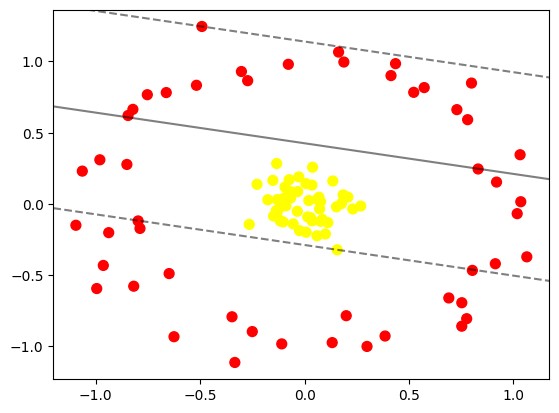

In [3]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.96417508, -0.43174362],
       [-0.10305867, -0.12643639],
       [-0.6626791 ,  0.78170107],
       [ 0.79914308,  0.84848079],
       [ 0.06076188,  0.03339496],
       [ 0.13204955, -0.97346219],
       [ 0.38517923, -0.9272494 ],
       [-0.06680346,  0.04215645],
       [ 0.29872083, -1.00029408],
       [ 0.15285237, -0.02014839],
       [-0.84553042,  0.62078619],
       [ 0.18792181,  0.99610735],
       [ 0.75255315, -0.85831697],
       [ 0.5726327 ,  0.81669924],
       [ 0.16263592,  1.06601345],
       [-0.75343955,  0.76677587],
       [ 0.69055157, -0.66009446],
       [ 0.78069764,  0.59147466],
       [ 0.19922553, -0.78456852],
       [-0.0658889 ,  0.0855471 ],
       [ 0.72909014,  0.66190321],
       [-0.12990355,  0.03088111],
       [ 0.07623607, -0.121934  ],
       [-0.14860058, -0.08473019],
       [ 0.00718962, -0.19885078],
       [-0.79739626, -0.11933311],
       [-0.98075824,  0.3098186 ],
       [ 0.01489289, -0.09113704],
       [ 0.02836598, -0.09611138],
       [ 0.43539246,  0.98477523],
       [-0.02438661, -0.18794171],
       [-0.85129902,  0.27707157],
       [ 0.13490901,  0.16100324],
       [ 0.08548671, -0.10971478],
       [ 0.09931401, -0.21084832],
       [ 0.26843343, -0.01472226],
       [-0.13416567, -0.0756516 ],
       [ 0.80333339, -0.46646683],
       [-0.09599845,  0.04183669],
       [-0.30275292,  0.92949252],
       [-0.03517772, -0.05161251],
       [-0.07420945,  0.16982954],
       [-0.82250973,  0.66378095],
       [-1.06483518,  0.23034563],
       [ 1.03522884,  0.01542199],
       [-0.11612408, -0.11984834],
       [ 0.00681519,  0.14266381],
       [ 0.75276821, -0.69355411],
       [ 0.18452395,  0.06332856],
       [ 0.41364124,  0.90089603],
       [ 0.06899271,  0.04694692],
       [-0.33423618, -1.11296833],
       [-0.17624641,  0.02928495],
       [-0.05485429, -0.14005029],
       [-0.0939287 ,  0.11856853],
       [-0.0332167 ,  0.08691921],
       [ 0.02003862,  0.02378279],
       [ 0.0348988 ,  0.13238761],
       [-0.13558587, -0.04626591],
       [ 0.52244996,  0.78338205],
       [-0.27280293,  0.86525958],
       [-0.64896798, -0.4888194 ],
       [ 1.06403253, -0.37144005],
       [ 0.11087114, -0.13108536],
       [-0.93827054, -0.20151409],
       [-0.08684139,  0.04945456],
       [-0.13382174,  0.28374911],
       [ 0.03562184, -0.1186813 ],
       [-1.09550039, -0.1496949 ],
       [-0.09933314,  0.03827786],
       [-0.34782246, -0.79217058],
       [ 0.1762763 ,  0.00278719],
       [-0.25072135, -0.89608588],
       [-0.78853206, -0.17196691],
       [-0.10959058, -0.98249021],
       [ 1.0318688 ,  0.34533922],
       [ 0.05926863, -0.22342733],
       [-0.02802824,  0.18965888],
       [ 0.0380004 ,  0.25771179],
       [-0.26526721, -0.14353645],
       [ 0.07167017, -0.03515923],
       [ 0.83085837,  0.24542275],
       [-0.81852026, -0.5775672 ],
       [ 0.15607742, -0.32187649],
       [-0.08976442, -0.01334781],
       [ 0.77612277, -0.80554347],
       [-0.22813953,  0.13789518],
       [-0.51809825,  0.83280265],
       [-0.07811102,  0.98013361],
       [ 1.01795819, -0.06824243],
       [ 0.23059207, -0.03527685],
       [-0.15216259,  0.16511497],
       [-0.1255252 , -0.03894644],
       [-0.49203032,  1.24567653],
       [ 0.07596695,  0.01578662],
       [ 0.91333987, -0.41984309],
       [-0.99569713, -0.59399522],
       [ 0.20705453,  0.04792669],
       [-0.62566229, -0.9321154 ],
       [ 0.91908126,  0.15346503]]), y=array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0]))>

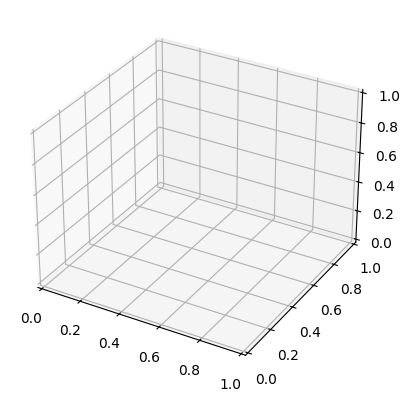

In [4]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

## Langkah 2 - Fitting Model

> Walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan

In [5]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

> Plot hasil decision boundaries dari kernel RBF

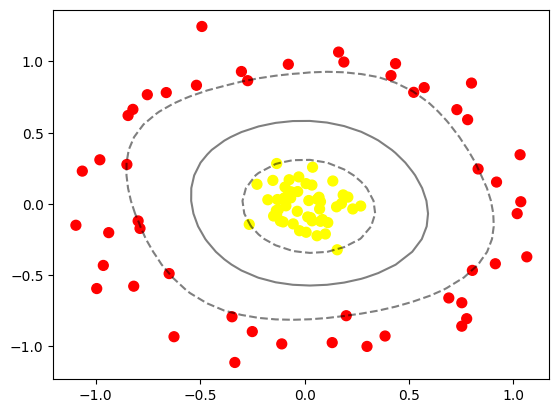

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')